# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

In [2]:
df = pd.read_csv('../../data/processed/transformed_model_flight_data.csv')
df

,op_carrier_fl_num,op_unique_carrier,origin_airport_id,dest_airport_id,distance,route,month,day,fl_date,arr_delay,Key,AvgTemp,Precipitation,Snow_mm,WindSpeed,lat,lon
0,1610,22,11618,13495,1167,1962,3,1,2019-03-01,0.0,40.692501-40.692501,0.8,1.3,30.0,15.9,40.692501,-74.168701
1,4909,6,11618,14524,277,1978,12,6,2019-12-06,-17.0,40.692501-40.692501,5.7,0.0,0.0,12.2,40.692501,-74.168701
2,3556,26,11618,11193,569,1928,4,3,2018-04-03,-9.0,40.692501-40.692501,4.9,5.8,30.0,11.1,40.692501,-74.168701
3,1382,2,11618,11298,1372,1932,9,7,2019-09-07,68.0,40.692501-40.692501,20.4,0.0,0.0,6.3,40.692501,-74.168701
4,3517,26,11618,13495,1167,1962,2,5,2018-02-05,-37.0,40.692501-40.692501,0.3,0.0,0.0,13.4,40.692501,-74.168701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97302,5026,19,11092,11292,283,1111,9,22,2019-09-22,0.0,38.75500107-38.75500107,16.0,0.0,0.0,0.0,38.755001,-109.754997
97303,5031,19,11092,11292,283,1111,8,10,2019-08-10,-12.0,38.75500107-38.75500107,27.3,0.0,0.0,0.0,38.755001,-109.754997
97304,5079,19,11092,11292,283,1111,8,15,2018-08-15,2.0,38.75500107-38.75500107,28.5,0.0,0.0,10.7,38.755001,-109.754997
97305,5031,19,11092,11292,283,1111,5,26,2019-05-26,-22.0,38.75500107-38.75500107,18.3,0.0,0.0,11.4,38.755001,-109.754997


In [17]:
df.columns.tolist()

['op_carrier_fl_num',
 'op_unique_carrier',
 'origin_airport_id',
 'dest_airport_id',
 'distance',
 'route',
 'month',
 'day',
 'fl_date',
 'arr_delay',
 'Key',
 'AvgTemp',
 'Precipitation',
 'Snow_mm',
 'WindSpeed',
 'lat',
 'lon']

In [3]:
# X = df.drop(['op_unique_carrier','origin_airport_id', 'dest_airport_id','day','fl_date','Key','lat','lon','arr_delay'], axis=1)
X = df.drop(['op_unique_carrier','dest_airport_id','day','fl_date','Key','lat','fl_date','arr_delay'], axis=1)
y = df['arr_delay']

                   op_carrier_fl_num  origin_airport_id  distance     route  \
op_carrier_fl_num           1.000000          -0.021725 -0.360852 -0.018616   
origin_airport_id          -0.021725           1.000000  0.065652  0.996187   
distance                   -0.360852           0.065652  1.000000  0.068845   
route                      -0.018616           0.996187  0.068845  1.000000   
month                       0.011208          -0.004020  0.001494 -0.003994   
AvgTemp                    -0.077079           0.011714  0.050612  0.011279   
Precipitation               0.000282          -0.037302 -0.009797 -0.037477   
Snow_mm                     0.010457          -0.008375 -0.015987 -0.008250   
WindSpeed                  -0.017120           0.004950  0.049889  0.013727   
lon                         0.141006          -0.285054 -0.129459 -0.284818   

                      month   AvgTemp  Precipitation   Snow_mm  WindSpeed  \
op_carrier_fl_num  0.011208 -0.077079       0.000282 

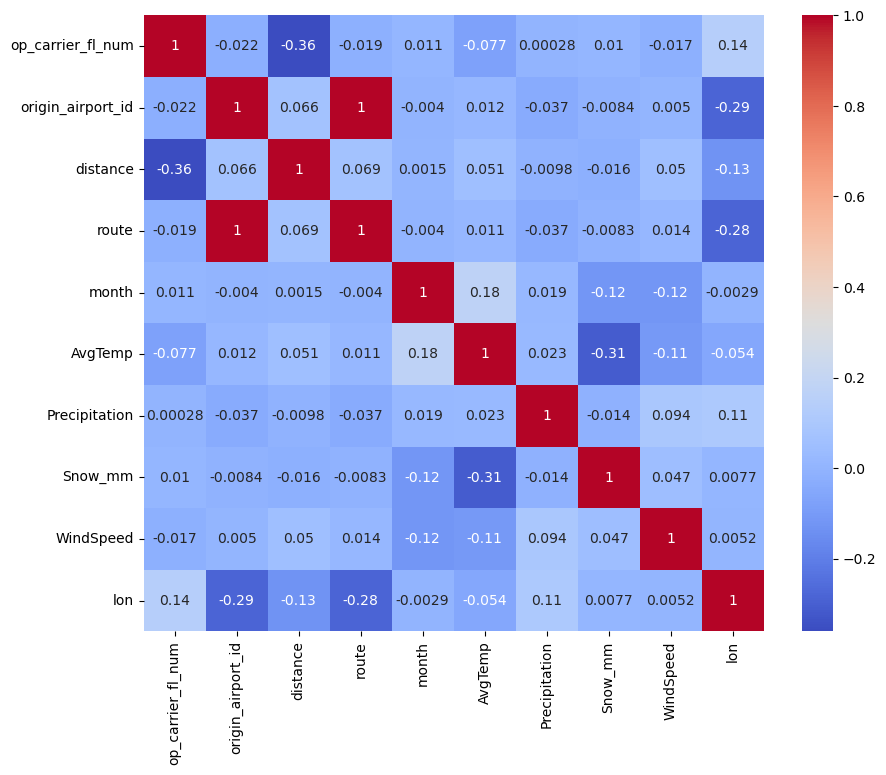

In [4]:
# Assuming your independent variables are stored in a pandas DataFrame called X
corr_matrix = X.corr()

# Print the correlation matrix
print(corr_matrix)

# Create a heatmap of the correlation matrix
#Set figure size to fit all variables
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

## Linear Regression

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
X_scaled = scaler.fit_transform(X)

In [16]:
# split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
# train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [18]:
# evaluate the model on the testing dataset
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 2753.377086703954


In [25]:
from scipy import stats
from sklearn.metrics import r2_score

In [43]:
# Evaluate the model on the training data
r_sq = lr_model.score(X_train, y_train)

# Print the model score
print("Model score train data:", r_sq)

# Evaluate the model on the test data
r_sq = lr_model.score(X_test, y_test)

# Print the model score
print("Model score test data:", r_sq)

Model score train data: 0.011191761689650637
Model score test data: 0.014515684350750124


In [41]:
# Evaluate the model using R^2 score
score = r2_score(y_test, y_pred)
print("R^2 score for linear regression:", score)

R^2 score for linear regression: 0.01451365854585751


In [16]:
from sklearn.feature_selection import f_regression

# Get the number of features in the model
n_features = X_train.shape[1]
n_features

10

In [17]:
# Calculate the adjusted R-squared value
n_samples = X_train.shape[0]
adj_r_sq = 1 - (1 - r_sq) * (n_samples - 1) / (n_samples - n_features - 1)
adj_r_sq

0.011064721034113156

In [18]:
# Calculate the F-statistic and corresponding p-values for each feature
f_stats, p_values = f_regression(X_train, y_train)

#make a list of independent variable columns names
cols = X.columns.tolist()

# zip the array and list into a list of tuples
data = list(zip(cols, f_stats, p_values))

# create a DataFrame of the results
model_results = pd.DataFrame(data, columns=['Feature', 'F Stats', 'P Values'])
model_results


,Feature,F Stats,P Values
0,op_carrier_fl_num,41.769215,1.033122e-10
1,origin_airport_id,7.751790,5.367229e-03
2,distance,26.330764,2.883589e-07
3,route,7.108965,7.671522e-03
4,month,7.618926,5.777238e-03
5,AvgTemp,8.695341,3.191192e-03
6,Precipitation,698.708639,2.724787e-153
7,Snow_mm,45.781797,1.331174e-11
8,WindSpeed,65.685365,5.365736e-16
9,lon,35.789490,2.207867e-09


## Lasso & Ridge Regression

In [14]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [40]:
# Define the parameter grid for the grid search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create a Ridge regression model object
ridge_model = Ridge()

# Create a Lasso regression model object
lasso_model = Lasso()

# Create a grid search object for Ridge regression
grid_search_ridge = GridSearchCV(ridge_model, param_grid, cv=5)

# Create a grid search object for Lasso regression
grid_search_lasso = GridSearchCV(lasso_model, param_grid, cv=5)

# Fit the Ridge grid search to the training data
grid_search_ridge.fit(X_train, y_train)

# Fit the Lasso grid search to the training data
grid_search_lasso.fit(X_train, y_train)

# Print the best parameters and score for Ridge regression
print("Best parameters for Ridge regression:", grid_search_ridge.best_params_)
print("Best score for Ridge regression:", grid_search_ridge.best_score_)

# Print the best parameters and score for Lasso regression
print("Best parameters for Lasso regression:", grid_search_lasso.best_params_)
print("Best score for Lasso regression:", grid_search_lasso.best_score_)

Best parameters for Ridge regression: {'alpha': 1000}
Best score for Ridge regression: 0.010731450070757643
Best parameters for Lasso regression: {'alpha': 0.01}
Best score for Lasso regression: 0.010720645082338253


In [39]:
# train a ridge regression model
ridge_model = Ridge(alpha=100) 
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model using R^2 score
score = r2_score(y_test, y_pred)
print("R^2 score for Ridge regression:", score)

R^2 score for Ridge regression: 0.01451365854585751


In [36]:
# train a lasso regression model
lasso_model = Lasso(alpha=0.01) 
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model using R^2 score
score = r2_score(y_test, y_pred)
print("R^2 score for Lasso regression:", score)

R^2 score for Lasso regression: 0.014510160137610084


## Test Regression Model with Test Data

In [59]:
df1 = pd.read_csv('../../data/processed/transformed_week1_2020.csv')
df1

,op_carrier_fl_num,op_unique_carrier,origin_airport_id,dest_airport_id,distance,route,day,Key,fl_date,AvgTemp,Precipitation,Snow_mm,WindSpeed,lat,lon,Month
0,5390,21,14057,11292,991.0,2737,1,45.58869934-45.58869934,2020-01-01,10.8,3.8,0.0,11.9,45.588699,-122.598000,1
1,5752,6,14057,14747,129.0,2764,7,45.58869934-45.58869934,2020-01-07,11.3,2.8,0.0,24.8,45.588699,-122.598000,1
2,789,20,14057,11292,991.0,2737,2,45.58869934-45.58869934,2020-01-02,8.2,1.0,0.0,11.9,45.588699,-122.598000,1
3,1184,2,14057,14679,933.0,2763,7,45.58869934-45.58869934,2020-01-07,11.3,2.8,0.0,24.8,45.588699,-122.598000,1
4,1552,2,14057,14262,873.0,2760,7,45.58869934-45.58869934,2020-01-07,11.3,2.8,0.0,24.8,45.588699,-122.598000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9911,5147,17,14006,13930,342.0,2708,6,37.06079864501953-37.06079864501953,2020-01-06,5.3,0.0,0.0,7.9,37.060799,-88.773804,1
9912,5081,17,13121,13930,489.0,2064,2,37.8582992554-37.8582992554,2020-01-02,1.9,0.0,0.0,1.8,37.858299,-80.399498,1
9913,3845,14,11905,11298,140.0,1419,2,32.38399887084961-32.38399887084961,2020-01-02,12.1,4.6,0.0,11.9,32.383999,-94.711502,1
9914,4258,17,12003,14869,463.0,1466,6,47.48199844-47.48199844,2020-01-06,0.1,0.0,0.0,26.3,47.481998,-111.371002,1


In [21]:
df1.columns.tolist()

['op_carrier_fl_num',
 'op_unique_carrier',
 'origin_airport_id',
 'dest_airport_id',
 'distance',
 'route',
 'day',
 'Key',
 'fl_date',
 'AvgTemp',
 'Precipitation',
 'Snow_mm',
 'WindSpeed',
 'lat',
 'lon',
 'Month']

In [60]:
X_2020 = df1.drop(['op_unique_carrier','dest_airport_id','day','fl_date','Key','lat','fl_date'], axis=1)
X_2020.shape

(9916, 10)

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
X_2020_scaled = scaler.fit_transform(X_2020)

In [24]:
y_2020_pred = lr_model.predict(X_2020_scaled)
y_2020_pred.shape

(9916,)

In [25]:
X_2020['arr_delay'] = y_2020_pred
X_2020

,op_carrier_fl_num,origin_airport_id,distance,route,AvgTemp,Precipitation,Snow_mm,WindSpeed,lon,Month,arr_delay
0,5390,14057,991.0,2737,10.8,3.8,0.0,11.9,-122.598000,1,4.244054
1,5752,14057,129.0,2764,11.3,2.8,0.0,24.8,-122.598000,1,8.125746
2,789,14057,991.0,2737,8.2,1.0,0.0,11.9,-122.598000,1,1.322505
3,1184,14057,933.0,2763,11.3,2.8,0.0,24.8,-122.598000,1,4.862096
4,1552,14057,873.0,2760,11.3,2.8,0.0,24.8,-122.598000,1,5.115973
...,...,...,...,...,...,...,...,...,...,...,...
9911,5147,14006,342.0,2708,5.3,0.0,0.0,7.9,-88.773804,1,5.369864
9912,5081,13121,489.0,2064,1.9,0.0,0.0,1.8,-80.399498,1,4.559055
9913,3845,11905,140.0,1419,12.1,4.6,0.0,11.9,-94.711502,1,6.426901
9914,4258,12003,463.0,1466,0.1,0.0,0.0,26.3,-111.371002,1,8.732951


In [26]:
X_2020.sort_values(['arr_delay'], ascending = False).head(20)

,op_carrier_fl_num,origin_airport_id,distance,route,AvgTemp,Precipitation,Snow_mm,WindSpeed,lon,Month,arr_delay
9374,3617,11337,144.0,1130,-7.1,0.0,510.0,26.3,-92.193604,1,89.856296
9373,5150,11337,397.0,1131,-4.9,0.0,510.0,21.6,-92.193604,1,89.165381
9371,3685,11337,397.0,1131,-4.9,0.0,510.0,21.6,-92.193604,1,88.361202
9370,5186,11337,397.0,1131,-3.2,0.5,510.0,15.8,-92.193604,1,87.771495
9372,4025,11337,144.0,1130,-3.2,0.5,510.0,15.8,-92.193604,1,87.370185
9680,4600,11637,627.0,1313,-9.6,0.0,410.0,16.2,-96.815804,1,71.841739
9689,3654,11637,557.0,1315,-9.6,0.0,410.0,16.2,-96.815804,1,71.391123
9684,5203,11637,223.0,1314,-3.3,0.3,410.0,7.6,-96.815804,1,70.067835
9682,5203,11637,223.0,1314,-2.2,0.0,380.0,25.9,-96.815804,1,69.636606
9685,4183,11637,557.0,1315,-3.3,0.3,410.0,7.6,-96.815804,1,69.195904


In [27]:
X_2020.sort_values(['arr_delay']).head(20)

,op_carrier_fl_num,origin_airport_id,distance,route,AvgTemp,Precipitation,Snow_mm,WindSpeed,lon,Month,arr_delay
4416,344,12173,4817.0,1480,24.4,0.0,0.0,10.1,-157.924228,1,-6.169683
4380,448,12173,4983.0,1483,23.9,0.3,0.0,11.5,-157.924228,1,-5.825749
4434,218,12173,4243.0,1492,23.9,0.3,0.0,11.5,-157.924228,1,-5.244068
4451,8,12173,3784.0,1477,23.9,0.3,0.0,11.5,-157.924228,1,-4.950736
4397,102,12173,3784.0,1477,23.9,0.3,0.0,11.5,-157.924228,1,-4.899136
4453,201,12173,3801.0,1479,23.9,0.3,0.0,11.5,-157.924228,1,-4.857785
7531,596,13830,2935.0,2500,22.8,0.0,0.0,9.4,-156.431212,1,-4.624192
7519,42,13830,2338.0,2499,22.8,0.0,0.0,9.4,-156.431212,1,-4.369410
4420,383,12173,3365.0,1476,23.9,0.3,0.0,11.5,-157.924228,1,-4.353078
4395,362,12173,4962.0,1478,24.4,0.0,0.0,18.7,-157.924228,1,-4.241001


# Random Forest Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the random forest with optimized hyper parameters
rfc = RandomForestClassifier(n_estimators=200, max_depth=5, 
                             min_samples_split=10, min_samples_leaf=4, random_state=42)

In [6]:
y = y[0:15000]

In [7]:
X.columns.tolist()

['op_carrier_fl_num',
 'origin_airport_id',
 'distance',
 'route',
 'month',
 'AvgTemp',
 'Precipitation',
 'Snow_mm',
 'WindSpeed',
 'lon']

In [8]:
X = X.drop(['origin_airport_id','lon'], axis=1)

In [9]:
X = X[0:15000]

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
X_scaled = scaler.fit_transform(X)

In [11]:
# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [12]:
# Fit the classifier to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [56]:
# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: {:.2f}%".format(grid_search.best_score_ * 100))

C:\Users\joshl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best accuracy score: 4.38%


In [13]:
# Predict the labels of the test data
y_pred = rfc.predict(X_test)

In [14]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1 * 100))

Accuracy: 2.53%
Precision: 0.23%
Recall: 0.46%
F1 score: 0.18%


C:\Users\joshl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Test Random Forest

In [83]:
# X_2020 = X_2020.drop(['origin_airport_id','route'], axis=1)
X_2020 = X_2020.drop(['arr_delay'], axis=1)
X_2020.shape

(9916, 8)

In [84]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
X_scaled = scaler.fit_transform(X_2020)

In [85]:
# Predict the labels of the test data
y_2020_pred = rfc.predict(X_scaled)

In [86]:
X_2020['arr_delay'] = y_2020_pred
X_2020

,op_carrier_fl_num,distance,AvgTemp,Precipitation,Snow_mm,WindSpeed,lon,Month,arr_delay
0,5390,991.0,10.8,3.8,0.0,11.9,-122.598000,1,-14.0
1,5752,129.0,11.3,2.8,0.0,24.8,-122.598000,1,-9.0
2,789,991.0,8.2,1.0,0.0,11.9,-122.598000,1,-8.0
3,1184,933.0,11.3,2.8,0.0,24.8,-122.598000,1,-8.0
4,1552,873.0,11.3,2.8,0.0,24.8,-122.598000,1,-8.0
...,...,...,...,...,...,...,...,...,...
9911,5147,342.0,5.3,0.0,0.0,7.9,-88.773804,1,-9.0
9912,5081,489.0,1.9,0.0,0.0,1.8,-80.399498,1,-12.0
9913,3845,140.0,12.1,4.6,0.0,11.9,-94.711502,1,-9.0
9914,4258,463.0,0.1,0.0,0.0,26.3,-111.371002,1,-9.0


In [87]:
X_2020.value_counts(['arr_delay'])

arr_delay
-9.0         2890
-8.0         2829
-12.0        2617
-10.0         408
-14.0         299
-6.0          274
-2.0          241
-16.0          64
-11.0          56
-18.0          40
-20.0          40
-17.0          40
-7.0           38
 1.0           24
-5.0           15
-13.0          14
-1.0           10
 0.0            6
-15.0           3
-4.0            3
 3.0            3
-3.0            2
dtype: int64

In [88]:
X_2020.sort_values(['arr_delay'], ascending = False).head(20)

,op_carrier_fl_num,distance,AvgTemp,Precipitation,Snow_mm,WindSpeed,lon,Month,arr_delay
5733,2890,2585.0,11.1,0.0,0.0,5.8,-122.375000,1,3.0
5785,2936,2586.0,11.1,0.0,0.0,5.8,-122.375000,1,3.0
5744,2890,2585.0,10.3,0.0,0.0,5.8,-122.375000,1,3.0
8976,81,1413.0,0.5,0.0,0.0,4.7,-89.693298,1,1.0
7733,62,1035.0,19.2,0.0,0.0,8.3,-80.095596,1,1.0
3060,90,2422.0,5.2,0.0,0.0,34.6,-73.779317,1,1.0
7216,19,2554.0,15.8,0.0,0.0,7.8,-81.308998,1,1.0
1829,1,2329.0,7.7,0.0,0.0,13.0,-77.037697,1,1.0
7743,62,1035.0,26.3,0.8,0.0,21.2,-80.095596,1,1.0
7755,22,1197.0,18.1,0.0,0.0,23.8,-80.095596,1,1.0


In [89]:
X_2020.sort_values(['arr_delay']).head(20)

,op_carrier_fl_num,distance,AvgTemp,Precipitation,Snow_mm,WindSpeed,lon,Month,arr_delay
1283,28,2475.0,18.9,0.0,0.0,12.6,-118.407997,1,-20.0
5537,31,2695.0,9.3,0.0,0.0,5.0,-115.151817,1,-20.0
5554,8,2173.0,9.7,0.0,0.0,5.8,-115.151817,1,-20.0
812,10,2717.0,10.6,0.0,0.0,23.0,-122.311134,1,-20.0
1026,10,2475.0,16.3,0.0,0.0,9.0,-118.407997,1,-20.0
809,27,2677.0,8.3,2.5,0.0,22.7,-122.311134,1,-20.0
1708,59,2404.0,7.4,0.0,0.0,8.7,-121.591003,1,-20.0
9744,48,1843.0,-5.4,6.6,0.0,8.4,-107.218002,1,-20.0
1007,42,2402.0,14.4,0.0,0.0,7.6,-118.407997,1,-20.0
47,25,2603.0,10.8,3.8,0.0,11.9,-122.598000,1,-20.0


## Naive Bayes

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [16]:
#perform Naive Bayes
# Create a Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model using the training data
gnb.fit(X_train, y_train)

# Predict the target values for the testing data
y_pred = gnb.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.0016666666666666668


## SVM

In [17]:
from sklearn.svm import SVC

In [18]:
# Create an SVM classifier
svm = SVC(kernel='linear')

# Train the classifier using the training data
svm.fit(X_train, y_train)

# Predict the target values for the testing data
y_pred = svm.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.023333333333333334


### Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [20]:
df = pd.read_csv('../../data/processed/transformed_model_flight_data.csv')

X = df.drop(['op_unique_carrier','dest_airport_id','day','fl_date','Key','lat','fl_date'], axis=1)
X = X.drop(['origin_airport_id','lon'], axis=1)

X_scaled = StandardScaler().fit_transform(X)

y = df['arr_delay']

In [21]:
pca = PCA(n_components=2) 
pca_features = pca.fit_transform(X_scaled)

print('Shape before PCA: ', X_scaled.shape)
print('Shape after PCA: ', pca_features.shape)

Shape before PCA:  (97307, 9)
Shape after PCA:  (97307, 2)


In [22]:
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,1.507989,1.573218
1,0.501766,-1.596116
2,1.581489,-0.061449
3,-1.292475,0.339239
4,1.310729,0.733483
...,...,...
97302,-0.172875,-2.235687
97303,-0.737256,-2.348480
97304,-0.366519,-1.895986
97305,0.570597,-1.420928


## Modelling with PCA Transformed Variables

In [23]:
y = y[0:15000]

In [24]:
pca_df = pca_df[0:15000]

In [25]:
# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.2, random_state=42)

In [26]:
# Create a Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model using the training data
gnb.fit(X_train, y_train)

# Predict the target values for the testing data
y_pred = gnb.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.025666666666666667


In [28]:
# Create an SVM classifier
svm = SVC(kernel='linear')

# Train the classifier using the training data
svm.fit(X_train, y_train)

# Predict the target values for the testing data
y_pred = svm.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.026


In [27]:
# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier using the training data
rfc.fit(X_train, y_train)

# Predict the target values for the testing data
y_pred = rfc.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.02033333333333333


## PCA Plots

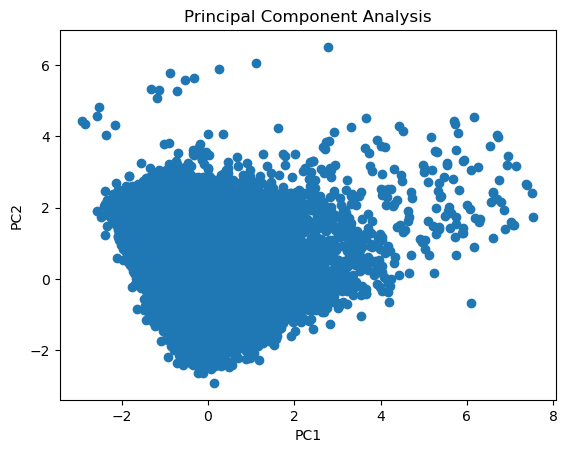

In [29]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('Principal Component Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [48]:
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_

# Feature names before PCA
feature_names = X.columns.values.tolist()

# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]

# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))

# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2
feature_names,,
op_carrier_fl_num,0.114537,0.306458
origin_airport_id,-0.644472,0.119922
distance,-0.151112,-0.273235
route,-0.644499,0.121616
month,-0.004006,-0.383378
arr_delay,0.026876,0.052453
AvgTemp,-0.048167,-0.581625
Precipitation,0.074743,0.008774
Snow_mm,0.027016,0.497189


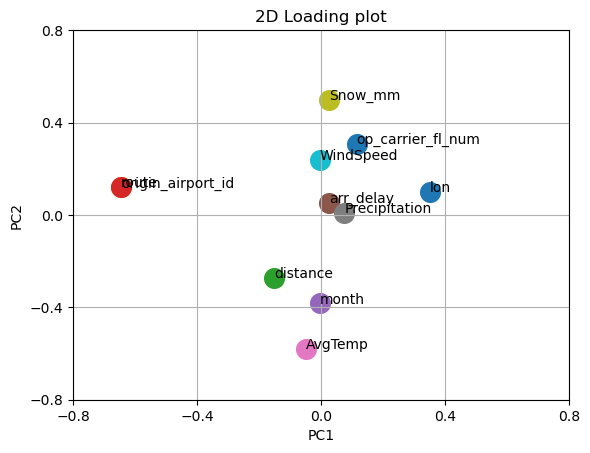

In [49]:
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()

# Show plot
plt.title('2D Loading plot')
plt.show()

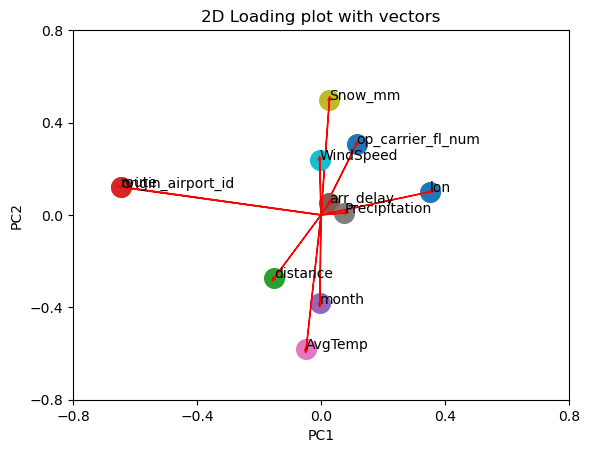

In [50]:
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot with vectors')
plt.show()

In [51]:
pca_df_scaled = pca_df.copy()
 
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

pca_df_scaled

,PC1,PC2
0,0.124758,0.078387
1,0.163572,0.022305
2,0.159057,0.081067
3,0.107529,-0.074859
4,0.131942,0.067970
...,...,...
97302,0.148110,-0.033508
97303,0.141467,-0.064212
97304,0.141101,-0.043221
97305,0.145215,0.008030


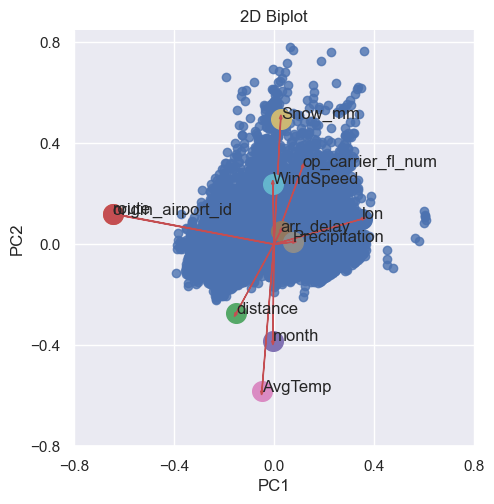

In [59]:
import seaborn as sns
sns.set()
 
xs = loadings[0]
ys = loadings[1]

sns.lmplot(
    x='PC1', 
    y='PC2',
    data=pca_df_scaled, 
    fit_reg=False,
    legend = False
    )


for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
plt.title('2D Biplot')
plt.show()

## Scree Plot Check

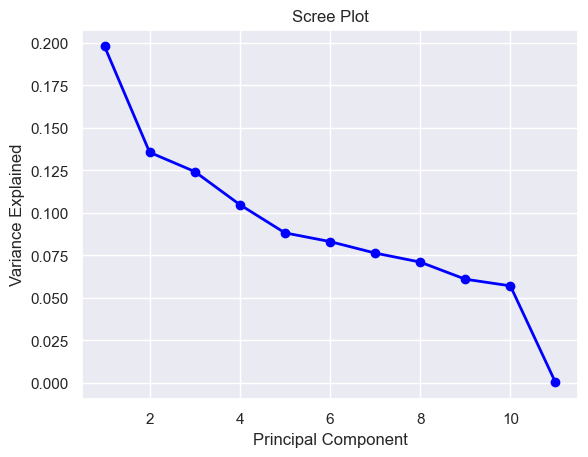

In [62]:
#define PCA model to use
pca = PCA(n_components=11)

#fit PCA model to data
pca_scree_plot = pca.fit_transform(X_scaled)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

### Modeling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.